# 1.Defining the Question

a) Specifying the Data Analytic Question

>Determine how we can predict which individuals are most likely to have or use a bank account.



b) Defining the Metric for Success

> Help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



c) Understanding the context

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.






d) Recording the Experimental Design

> Perform univariate analysis by calculating and interpreting measures of central tendency (mode, median, mean) for a set of data and select an appropriate measure of dispersion and correctly calculate and interpret the statistic.


> Perform bivariate analysis by creating visualizations i.e. scatter plots, line charts to determine the relationship between variables, by describing the relationship between two quantitative variables, and computing and interpreting the Pearson correlation coefficient.

> Perform multivariate analysis by finding relationships between variables using multiple regression analysis and applying reduction techniques to our analysis. 







e) Data Relevance

> Our dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.


> The variables we have country, year, uniqueid, location type, cellphone access, household size, age of respondent, gender of respondent, relationship with head, marital status, education level and job level will help us answer the question how we can predict which individuals are most likely to have or use a bank account.





# 2.Reading the Data

a) Importing our libraries

In [0]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm



In [0]:
#loading and previewing our dataset
FinancialDataset = pd.read_csv("http://bit.ly/FinancialDataset")
FinancialDataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3.Checking the Data

In [0]:
# Determining the no. of records in our dataset
FinancialDataset.shape

(23524, 13)

In [0]:
# checking the columns
FinancialDataset.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
#Renaming our columns
FinancialDataset.rename({'Has a Bank account': 'bank_account', 'Type of Location': 'location', 'The relathip with head': 'relationship', 'Respondent Age': 'age', 
                'Level of Educuation': 'education_level', 'Type of Job': 'job', 'Cell Phone Access': 'cellphone'}, axis=1, inplace=True)
FinancialDataset.head()

,country,year,uniqueid,bank_account,location,cellphone,household_size,age,gender_of_respondent,relationship,marital_status,education_level,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Checking the data types
FinancialDataset.dtypes

country                  object
year                      int64
uniqueid                 object
bank_account             object
location                 object
cellphone                object
household_size          float64
age                     float64
gender_of_respondent     object
relationship             object
marital_status           object
education_level          object
job                      object
dtype: object

In [0]:
# Checking the number of missing values in our dataset
FinancialDataset.isnull().sum()

country                 14
year                     0
uniqueid                 0
bank_account            36
location                15
cellphone               11
household_size          28
age                     34
gender_of_respondent    34
relationship             4
marital_status          32
education_level         29
job                     30
dtype: int64

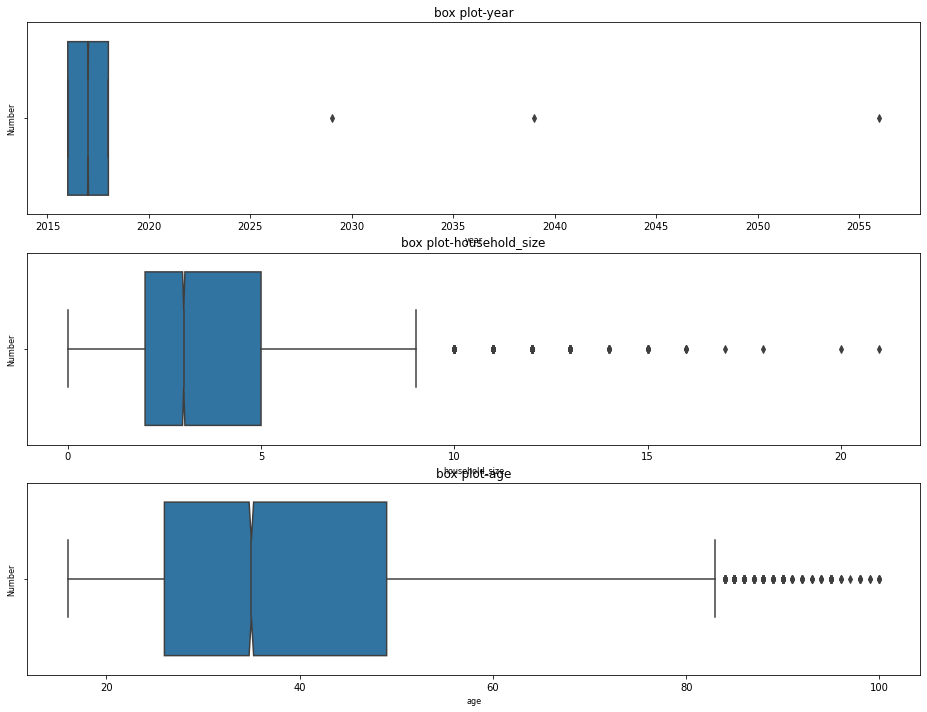

In [0]:
#checking for outliers using box plot
col_names= ['year', 'household_size', 'age']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  sns.boxplot(FinancialDataset[col_val], notch= True, ax=ax[i])
  ax[i].set_title ('box plot-'+ col_val, fontsize= 12)
  ax[i].set_xlabel(col_val, fontsize= 8)
  ax[i].set_ylabel('Number', fontsize= 8)

plt.show()
#column year has outliers

In [0]:
#check for anomalies in the year column
FinancialDataset.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#check for anomalies in the age column
FinancialDataset.age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

# 4.Tidying the Dataset

In [0]:
# Dropping all null values in our dataframe

FinancialDataset.dropna(inplace = True)
FinancialDataset.isnull().sum()

country                 0
year                    0
uniqueid                0
bank_account            0
location                0
cellphone               0
household_size          0
age                     0
gender_of_respondent    0
relationship            0
marital_status          0
education_level         0
job                     0
dtype: int64

In [0]:
# Removing the anomalies on the year column

names = FinancialDataset[FinancialDataset['year'] > 2018].index
FinancialDataset.drop(names, inplace = True)
FinancialDataset.year.unique()

array([2018, 2016, 2017])

In [0]:
# dropping unnecessary columns
FinancialDataset=FinancialDataset.drop(columns=["uniqueid"])
FinancialDataset.columns

Index(['country', 'year', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender_of_respondent', 'relationship',
       'marital_status', 'education_level', 'job'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


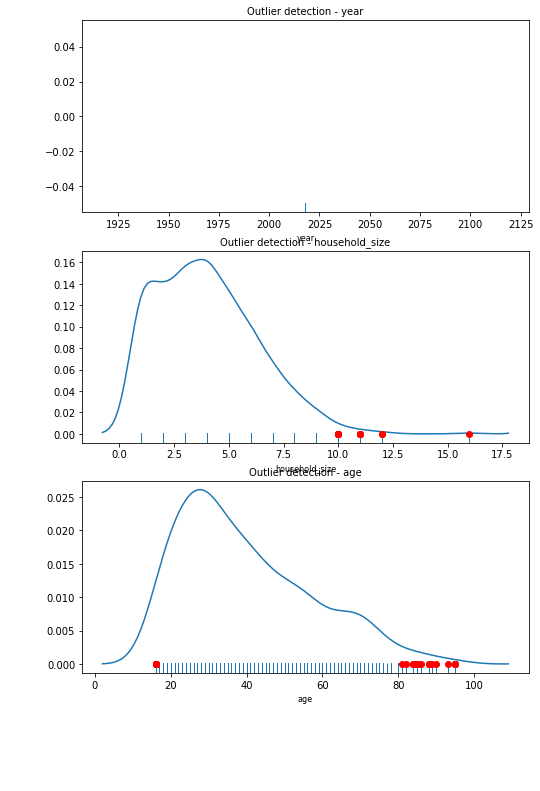

In [0]:
#remove outliers using percentile
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['year', 'household_size', 'age']

fig, ax = plt.subplots(len(col_names), figsize=(8,12))

for i, col_val in enumerate(col_names):
    x = FinancialDataset[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# 5.Exploratory Analysis



# 1.  Univariate Analysis






>Frequency Tables



In [0]:
#Frequency table of location
location = pd.crosstab(index = FinancialDataset['location'], columns = 'count')
location



col_0,count
location,
Rural,14263
Urban,9077


In [0]:
#Frequency table of cellphone
cellphone = pd.crosstab(index = FinancialDataset['cellphone'], columns = 'count')
cellphone

col_0,count
cellphone,
No,6009
Yes,17331




> Pie Charts



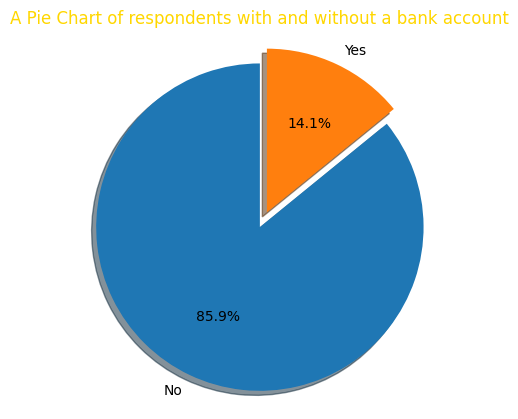

In [0]:
#pie chart of those who have and those who dont have a bank account
account= FinancialDataset['bank_account'].value_counts()
sizes=account.index
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(account, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'gold')
plt.show()
#The pie chart indicates that 14.1% have a bank account while 85.9% do not have an account

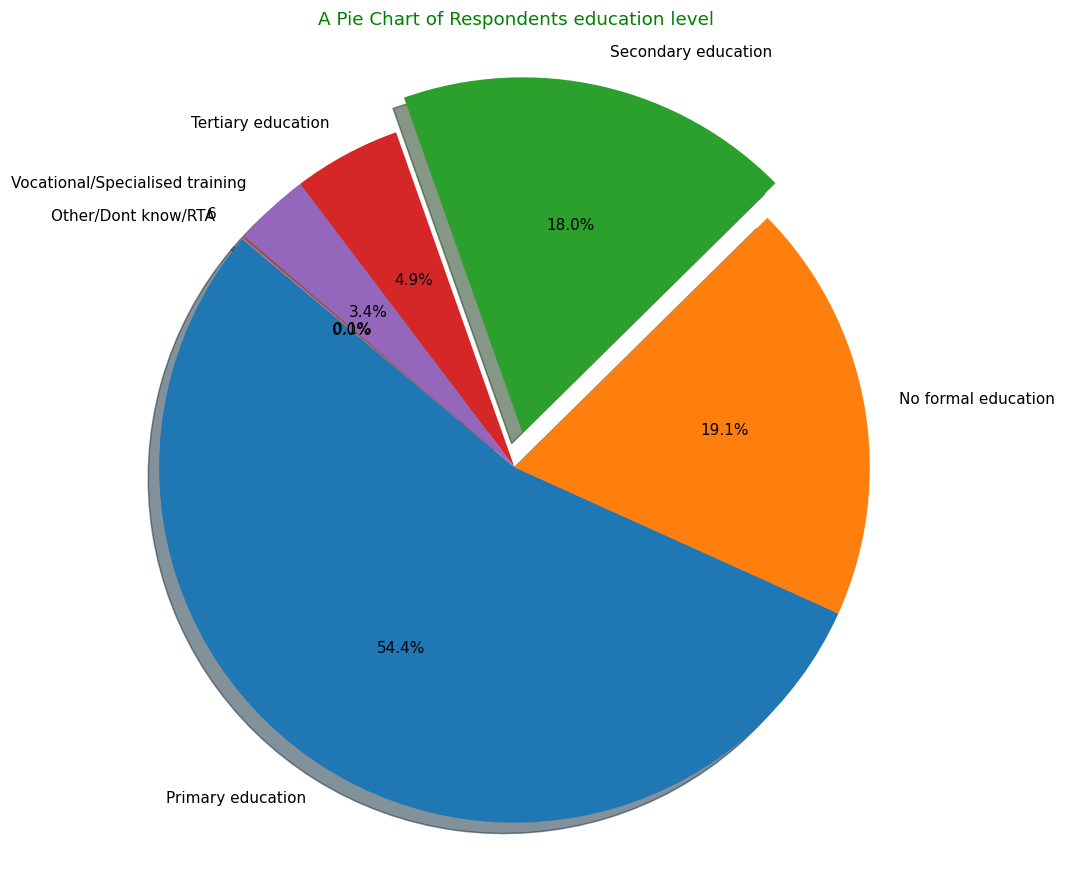

In [0]:
#pie chart of their educational level
education= FinancialDataset['education_level'].value_counts()
labels=education.index
plt.figure(figsize = (10,10), dpi = 110)
plt.pie(education, labels = labels, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents education level', color = 'green')
plt.show()
#The piechart indicates the percentage of different education level of the respondent with the highest being of primary education and lowest 6



>Bar Charts



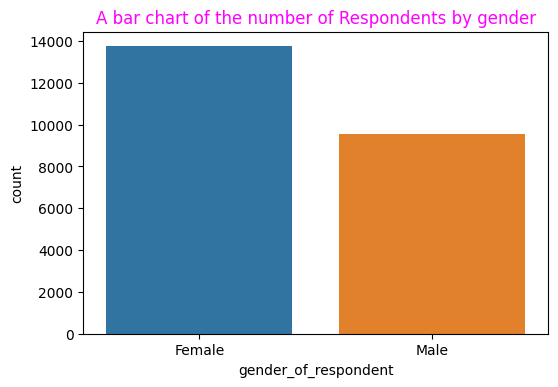

In [0]:
#bar chart of the respondents gender
plt.figure(dpi = 100)
sns.countplot(FinancialDataset.gender_of_respondent)
plt.title('A bar chart of the number of Respondents by gender', color = 'magenta')
plt.show()
#the bar chart shows the number of female and male respondents, the female being highest in number

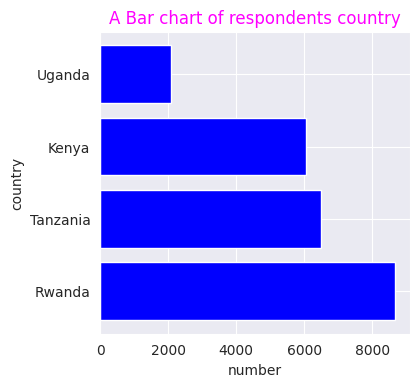

In [0]:
#horizontal bar chart of respondents country
country = FinancialDataset.country .value_counts()
labels= country.index

plt.figure(figsize = (4,4), dpi = 100)
plt.barh(labels, country, color = 'blue')
plt.ylabel("country")
plt.xlabel('number')
plt.title("A Bar chart of respondents country", color = 'magenta')
plt.show()
# The horizontal bar plot below shows the respondents country having majority of them from Rwanda,Tanzania,Kenya and Uganda in that order



>Histograms



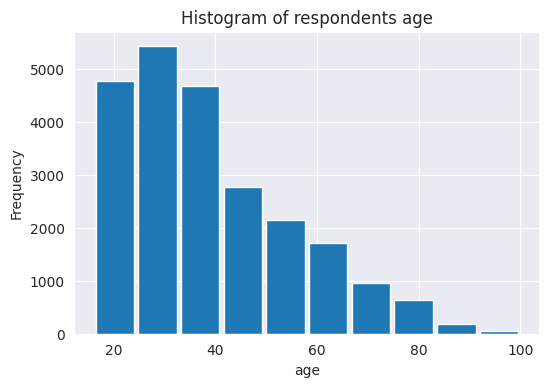

In [0]:
#Histogram of respondents age
age = FinancialDataset['age']
plt.figure(dpi = 100)
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of respondents age')
plt.show()
# the Histogram of the respondents age shows majority were of age 30-40

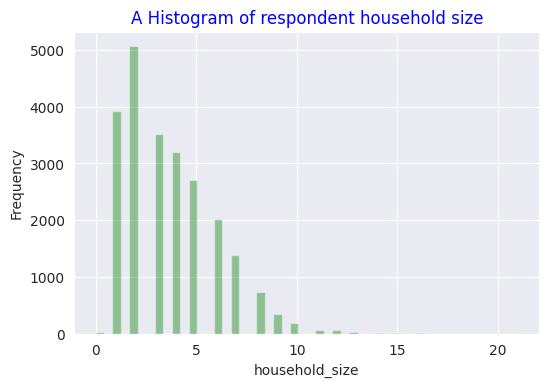

In [0]:
#Histogram of respondent household_size
plt.figure(dpi = 100)
sns.distplot(FinancialDataset['household_size'], kde = False, color = 'green')  
plt.title('A Histogram of respondent household size', color = 'blue')
plt.ylabel('Frequency')
plt.show()
# The histogram of the respondent household size indicates that the majority had a household size of 3



> Numerical Variables



a)Measures of Central Tendency

MEAN

In [0]:
# Mean of the respondent household size

FinancialDataset.household_size.mean()

# the mean of the household size is 3

3.688560411311054

In [0]:
# Mean of the respondent respondent age

FinancialDataset.age.mean()

# The mean of the respondent age is 38

38.80706940874036

MEDIAN

In [0]:
# median of the respondent household_size

FinancialDataset.household_size.median()

# The median of the respondent household_size is 3

3.0

In [0]:
# Median of the respondent respondent age

FinancialDataset.age.median()

# The  Median of the respondent respondent age is 35

35.0

MODE

In [0]:
# Mode of the respondent household size

FinancialDataset.household_size.mode()

# the Mode of the respondent household size is 2

0    2.0
dtype: float64

In [0]:
# Mode of the respondent respondent age

FinancialDataset.age.mode()

# the Mode of the respondent respondent age 30

0    30.0
dtype: float64

b)Measures of Dispersion/Variability/Spread

STANDARD DEVIATION

In [0]:
#Standard deviation is the measurement of average distance between each quantity and mean. 
#standard Deviation of the household size

FinancialDataset.household_size.std()

#standard Deviation of the household size is 2.3, A low standard deviation indicates that the data points 
# tend to be close to the mean of the data set, while a high standard deviation indicates that the 
# data points are spread out over a wider range of values.


2.2812745975350435

In [0]:
# Standard Deviation of the respondent age

FinancialDataset.age.std()

 #Standard Deviation of the respondent age is 16.

16.519904564514412

VARIANCE

In [0]:
# Variance is a square of average distance between each quantity and mean. 
#variance of the household size

FinancialDataset.household_size.var()

# the variance of the household size 5.2,the variance tells you how scattered around the centre of mass the points are.
#this tells you that the data have some similarities in the household size.

5.204213789358675

In [0]:
# variance of the respondent age

FinancialDataset.age.var()

# the variance of the respondent age is 272 this tells you that there are dis-similarities in respondent age

272.90724682066417

RANGE

In [0]:
# It is the difference between lowest and highest value
#Range of the household size

household_Max = FinancialDataset.household_size.max()
household_Min = FinancialDataset.household_size.min()
household_Range = household_Max - household_Min
household_Range

# the Range of the household size is 21

21.0

In [0]:
#Range of the respondent age
age_max = FinancialDataset.age.max()
age_min = FinancialDataset.age.min()
age_range = age_max - age_min
age_range

#the Range of the respondent age is 84

84.0

QUANTILES

In [0]:
 # quartiles are values that divide your data into quarters provided data is sorted in an ascending order. 

# Quantiles of the household_size
# sorting data frame by household size 
FinancialDataset.sort_values("household_size", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
FinancialDataset["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [0]:
# Quantiles of the respondent age
# sorting data frame by respondent age
FinancialDataset.sort_values("age", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

FinancialDataset["age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: age, dtype: float64

SKEWNESS

In [0]:
# Skewness is a measure of the asymmetry of the probability distribution

# Skewness of the household size

FinancialDataset.household_size.skew()

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.in this case we have a positive skew 0.974.

0.9741827150450616

In [0]:
# skewness of respondent age

FinancialDataset.age.skew()

# the skewness of respondent age is positive 0.84

0.8406145812311228

KURTOSIS

In [0]:
#Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.
# There are three types of Kurtosis: Mesokurtic, Leptokurtic, Mesokurtic and Platykurtic. 
# Mesokurtic is the distribution which has similar kurtosis as normal distribution kurtosis, which is zero.
# Leptokurtic is the distribution which has kurtosis greater than a Mesokurtic distribution. Tails of such distributions are thick and heavy. 
# If the curve of a distribution is more peaked than Mesokurtic curve, it is referred to as a Leptokurtic curve.
# ***
# Platykurtic is the distribution which has kurtosis lesser than a Mesokurtic distribution. Tails of such distributions thinner. 
# If a curve of a distribution is less peaked than a Mesokurtic curve, it is referred to as a Platykurtic curve.
# 
# If the kurtosis is close to 0, then a normal distribution is often assumed. These are called mesokurtic distributions. 
# If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.  
# If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.

# Kurtosis of the household size

FinancialDataset.household_size.kurt()

# the kurtosis of the household size is 1.2 which is greater than 0 then the distribution has heavier tail and is called leptokurtic.

1.1538357462528523

In [0]:
# Kurtosis of respondent age

FinancialDataset.age.kurt()

# the kurtosis of respondent age is 0.1 which is closer to 0 then we assume its a normal distribution called mesokurtic

0.09826807013177241

# 2. Bivariate Analysis

Scatter Plots

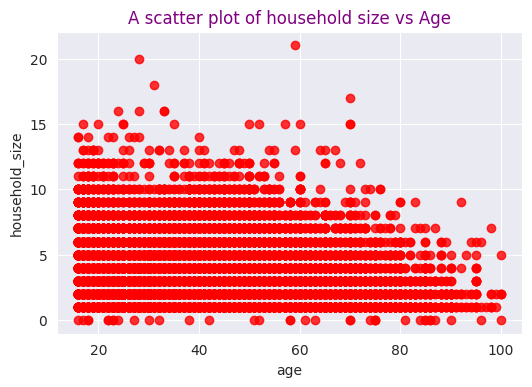

In [0]:
#Scatter plot of age vs household size

plt.figure(dpi = 100)
sns.regplot(x= FinancialDataset['age'], y= FinancialDataset['household_size'], fit_reg = False, color = 'red')
plt.title("A scatter plot of household size vs Age", color = 'purple')
plt.show()

# The scatter plot between age and household size show no correration at all since the plots are scattered unevenly.

Correlation

In [0]:
#correlation coefficent of Age and Household size 

coeff = FinancialDataset["age"].corr(FinancialDataset["household_size"]) 
print(coeff)

# the correlation between age and household size is -0.12 which is an indication of a weak correlation.

-0.11967115234154871


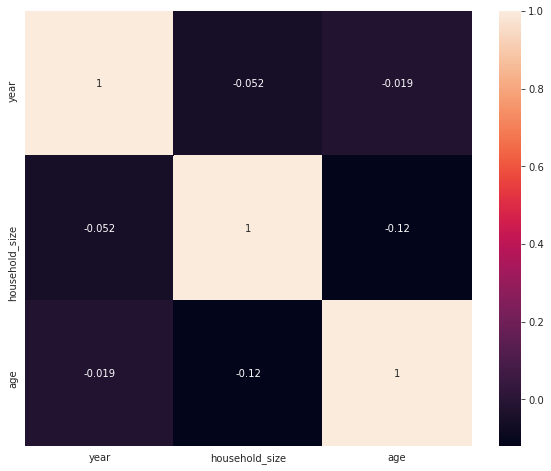

In [0]:
#corelation matrix using heatmaps
f, ax = plt.subplots(figsize=(10, 8))
corr = FinancialDataset.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, annot = True)
plt.show()

# the correlation between age, year and household size is  weak negative correlation with other variables other with themselves


# 3. Multivariate Analysis

# Reduction Techniques
In reduction techniques we can  our bunch of variables into 2 or 3 significant ones Without losing the essence of the data collected.

 Principal Component Analysis

In [0]:
FinancialDataset.columns

Index(['country', 'year', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender_of_respondent', 'relationship',
       'marital_status', 'education_level', 'job'],
      dtype='object')

In [0]:
# Converting the categories into dummy variables with ones and zeros
df = pd.get_dummies(FinancialDataset[['country', 'location', 'cellphone','gender_of_respondent', 'relationship',
       'marital_status', 'education_level', 'job']])
df.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_No,cellphone_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_Child,relationship_Head of Household,relationship_Other non-relatives,relationship_Other relative,relationship_Parent,relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_Dont Know/Refuse to answer,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#concanting our dummy dataframe with the original df
Financial= pd.concat([FinancialDataset, df], axis = 1)
Financial.head()

,country,year,bank_account,location,cellphone,household_size,age,gender_of_respondent,relationship,marital_status,education_level,job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_No,cellphone_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_Child,relationship_Head of Household,relationship_Other non-relatives,relationship_Other relative,relationship_Parent,relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_Dont Know/Refuse to answer,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Preprocessing

In [0]:
# Step 1
#The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
X = Financial.drop(columns = ['country', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender_of_respondent', 'relationship',
       'marital_status', 'education_level', 'job'], axis = 1)
y = Financial['bank_account']

In [0]:
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_No,cellphone_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_Child,relationship_Head of Household,relationship_Other non-relatives,relationship_Other relative,relationship_Parent,relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_Dont Know/Refuse to answer,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
X.shape

(23340, 39)

In [0]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: bank_account, dtype: object

In [0]:
# Step 2
#Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Step 3
#Normalization 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# Step 4
# Applying PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [0]:
 # Step 5
 # Explained Variance Ratio
 #The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
 # We execute the following line of code to find the "explained variance ratio".
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10153005, 0.07592334, 0.06680469, 0.05968309, 0.05310153,
       0.04452412, 0.04236606, 0.03753098, 0.03662307, 0.03403557,
       0.03095903, 0.02901555, 0.02844533, 0.02807928, 0.02612387,
       0.02588803, 0.0258336 , 0.02555692, 0.02529738, 0.02451124,
       0.02420081, 0.02311547, 0.022661  , 0.02202173, 0.01992192,
       0.01736616])

In [0]:
# Step 6
#Using  Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
pca = PCA(n_components= 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Step 7
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Step 8
#Performance Evaluation

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4036 out of 4668 instances, 
# resulting in 86.46% accuracy.

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the accuracy achieved with will feature set i.e. 86.46%. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components.
The number of principal components to retain in a feature set depends on several conditions such as storage capacity, training time, performance, etc. In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance and ignore those with diminishing variance returns. A good way is to plot the variance against principal components and ignore the principal components with diminishing values.

b) Linear Discriminant Analysis

In [0]:
#Step 1
# the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
X = Financial.iloc[:, 12:].values
y = Financial.iloc[:, 2].values


In [0]:
# Step 2: 
# Divide data into training and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step 3
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Step 4
# Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [0]:
# Step 5
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [0]:
# Step 6
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 88.88%
# which is a little bit higher than the accuracy achieved with 24 principal component, which was 86.46%. 

[[3991   45]
 [ 474  158]]
Accuracy0.8888174807197944


# Multiple Regression Analysis

In [0]:
df.columns

Index(['country_Kenya', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'location_Rural', 'location_Urban', 'cellphone_No', 'cellphone_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'relationship_Child', 'relationship_Head of Household',
       'relationship_Other non-relatives', 'relationship_Other relative',
       'relationship_Parent', 'relationship_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_6', 'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_Dont Know/Refuse to answer', 'job_Farming and Fishing',
       'job_Formally

In [0]:
#Binary encoding of our target variable
Financial['account'] = Financial['bank_account'].map( {'Yes':1, 'No':0} )
Bank = Financial[['account', 'bank_account']]
Bank.head()


,account,bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No


In [0]:
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.
X = df[['country_Kenya', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'location_Rural', 'location_Urban', 'cellphone_No', 'cellphone_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'relationship_Child', 'relationship_Head of Household',
       'relationship_Other non-relatives', 'relationship_Other relative',
       'relationship_Parent', 'relationship_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_6', 'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_Dont Know/Refuse to answer', 'job_Farming and Fishing',
       'job_Formally employed Government', 'job_Formally employed Private',
       'job_Government Dependent', 'job_Informally employed', 'job_No Income',
       'job_Other Income', 'job_Remittance Dependent', 'job_Self employed']]
Y = Financial['account']


In [0]:
X.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_No,cellphone_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_Child,relationship_Head of Household,relationship_Other non-relatives,relationship_Other relative,relationship_Parent,relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_Dont Know/Refuse to answer,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: account, dtype: int64

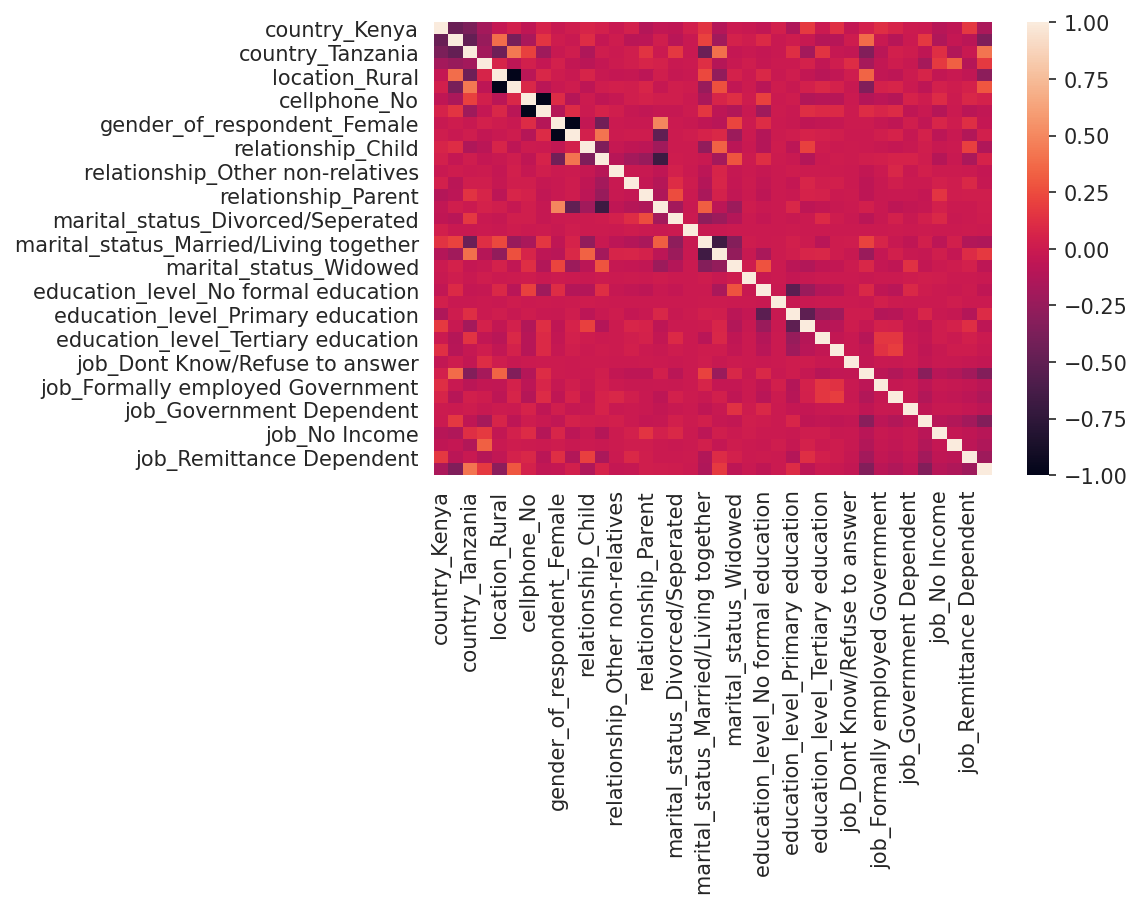

In [0]:
# Heatmap
# Plots the correlation.
# The darker shade shows that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
plt.figure(dpi = 150)
sns.heatmap(df.corr())

In [0]:
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data
# 60% remains in the training set.
# And finally we test that algorithm on the test data. 


# First we split the data into test set and training set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

In [0]:
# Then we create and train the model by fitting the linear regression model on the training data.

lm = LinearRegression()

results = lm.fit(X_train,Y_train)

In [0]:
# Grabbing predictions off the test set and see how well it did

predictions = lm.predict(X_test)

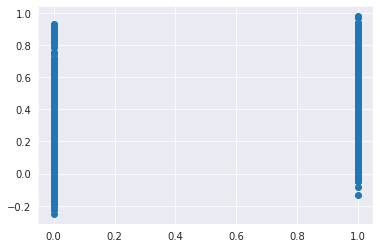

In [0]:
# visualising the prediction

plt.scatter(Y_test, predictions)

In [0]:
# Coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.


r2_score(Y_test, predictions) 

# The results indicates that the model explains 25.9% of the variability of the response data
# This indicates that the model is not a good fit.

0.2590219667480258

In [0]:
# The idea of linear regression model is to have the coefficients of the equation that will allow us to make a prediction. 

# We can return a python tuple containing an array with the coefficients and the intercept value as in the output

(lm.coef_, lm.intercept_)

(array([-1.76710056e+11, -1.76710056e+11, -1.76710056e+11, -1.76710056e+11,
         1.46010270e+12,  1.46010270e+12, -1.76803772e+12, -1.76803772e+12,
         1.85228668e+12,  1.85228668e+12, -9.28363030e+11, -9.28363030e+11,
        -9.28363030e+11, -9.28363030e+11, -9.28363030e+11, -9.28363030e+11,
        -2.30503690e+12, -2.30503690e+12, -2.30503690e+12, -2.30503690e+12,
        -2.30503690e+12, -1.59980882e+12, -1.59980882e+12, -1.59980882e+12,
        -1.59980882e+12, -1.59980882e+12, -1.59980882e+12, -1.59980882e+12,
         2.59353555e+11,  2.59353555e+11,  2.59353555e+11,  2.59353555e+11,
         2.59353555e+11,  2.59353555e+11,  2.59353555e+11,  2.59353555e+11,
         2.59353555e+11,  2.59353555e+11]), 3206213593712.229)

In [0]:
# P-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.
# The p-value represents the probability that the coefficient is actually zero. A predictor (an independent variable) 
# that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value 
# are related to changes in the response variable. 
# Conversely, a larger (insignificant) p-value suggests that changes 
# in the predictor are not associated with changes in the response.


X2 = sm.add_constant(X.values)  
model = sm.OLS(Y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                account   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     275.5
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        08:55:57   Log-Likelihood:                -4955.9
No. Observations:               23340   AIC:                             9974.
Df Residuals:                   23309   BIC:                         1.022e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.284e+11   1.92e+11     -2.753      0.0

# Challenging the solution and providing insights to make improvements.

From our question ,Determine how we can predict which individuals are most likely to have or use a bank account is a predictive type of analysis that its outcome would be more effective if we had more variables like transaction patterns of customers.This way we would have a more in depth assessment of financial inclusion in the Region and therefore come up with a better informed model.